In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets

iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

X0 = iris_X[iris_y == 0, :]
X1 = iris_X[iris_y == 1, :]

y0 = iris_y[iris_y == 0]
y1 = iris_y[iris_y == 1]

X = np.concatenate((X0, X1), axis=0)
y = np.concatenate((y0, y1))

# Using Petal_Length and Petal_Width
X = X[:,2:4]

plt.figure(figsize=(10, 6))
plt.scatter(X[y==0][:, 0], X[y==0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'r', label='1')
plt.legend()

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)

In [2]:
m = X.shape[1]

In [3]:
def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def loss_function(h, y):
    return (-y * np.log(h) - (1 - y) * np.log(1-h)).mean()

def predict(X, theta):
    h = sigmoid_function(np.dot(X, theta))
    return h.round()

In [4]:
lr = 0.01
num_iter = 50

theta = np.random.randn(X.shape[1])

losses = []
accs = []

In [5]:
for i in range(num_iter):
    
    for j in range(m):
        
        random_index = np.random.randint(m)
            
        # dùng cách này sẽ giữ nguyên được số chiều của vecto 
        xi = X[random_index:random_index + 1]
        yi = y[random_index:random_index+1]
        
        
        z = np.dot(xi, theta)
        h = sigmoid_function(z)
        loss = loss_function(h, yi)
    
        gradient = np.dot(xi.T, (h-yi)) / yi.size
        theta -= lr*gradient
    
        if (j%1 ==0):
            # loss
            losses.append(loss)
        
            # accuracy (độ chính xác)
            preds = predict(X, theta)
            acc = (preds == y).mean()
        
            accs.append(acc)

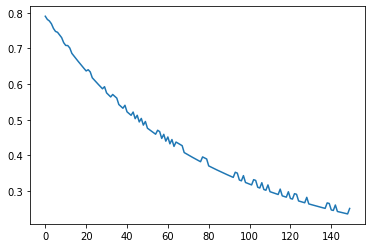

In [6]:
plt.plot(losses[:200])

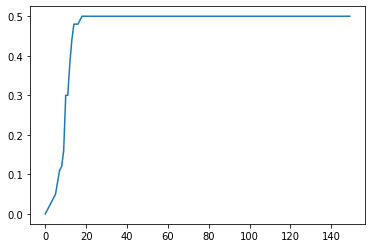

In [7]:
plt.plot(accs[:])